Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Classes: {'Bacterialblight': 0, 'Blast': 1, 'Tungro': 2}

Training with RMSProp optimizer...
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1241s 11s/step - accuracy: 0.3933 - loss: 1.2759 - val_accuracy: 0.7995 - val_loss: 0.8626
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.5727 - loss: 0.9039 - val_accuracy: 0.8399 - val_loss: 0.7059
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.7076 - loss: 0.7408 - val_accuracy: 0.8433 - val_loss: 0.6018
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.7704 - loss: 0.6440 - val_accuracy: 0.8376 - val_loss: 0.5223
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.8055 - loss: 0.5619 - val_accuracy: 0.8456 - val_loss: 0.4661
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.8219 - loss: 0.4946 - val_accuracy: 0.8491 - val_loss: 0.4233
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━

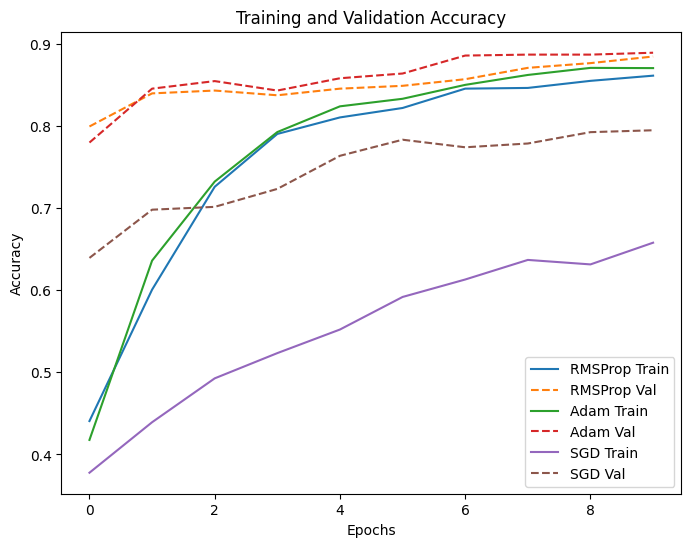

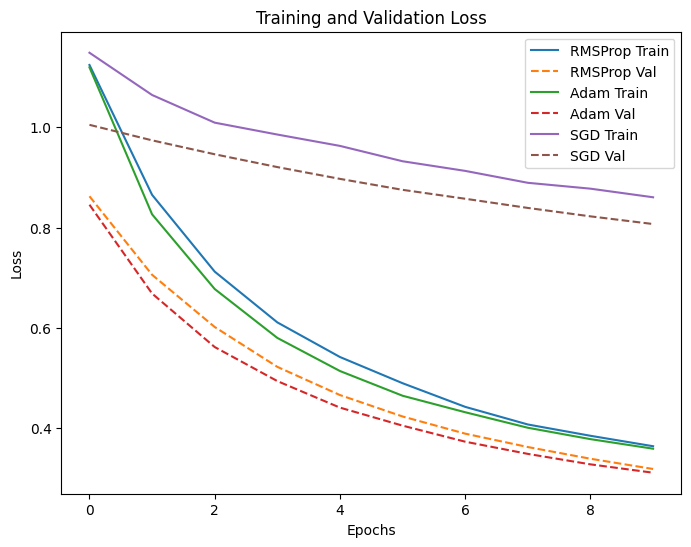

In [ ]:

# Rice Disease Detection - Optimizer Comparison


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# ------------------------
dataset_dir = "/content/drive/MyDrive/rice_img"


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Classes:", train_gen.class_indices)


def build_model():
    base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    return model


optimizers = {
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    "Adam": tf.keras.optimizers.Adam(learning_rate=1e-4),
    "SGD": tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
}

histories = {}

for opt_name, opt in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = build_model()
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        verbose=1
    )
    histories[opt_name] = history


for metric in ['accuracy', 'loss']:
    plt.figure(figsize=(8,6))
    for opt_name, history in histories.items():
        plt.plot(history.history[metric], label=f'{opt_name} Train')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{opt_name} Val')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Found 4347 images belonging to 3 classes.
Dataset loaded: (4347, 224, 224, 3) (4347, 3)

Training with RMSProp...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 327ms/step - accuracy: 0.3492 - loss: 1.3690 - val_accuracy: 0.7166 - val_loss: 0.8610
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.5514 - loss: 0.9493 - val_accuracy: 0.8283 - val_loss: 0.7014
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.6905 - loss: 0.7509 - val_accuracy: 0.8491 - val_loss: 0.5897
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - accuracy: 0.7531 - loss: 0.6488 - val_accuracy: 0.8468 - val_loss: 0.5135
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.7970 - loss: 0.5605 - val_accuracy: 0.8468 - val_loss: 0.4572
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.8349 - loss: 0.4912 - val_accuracy: 0.8583 - val_loss: 0.4133
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.8416 - loss: 0.4599 - val_accuracy: 0.8652 - val_loss: 0.3792
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.8373 - loss: 0

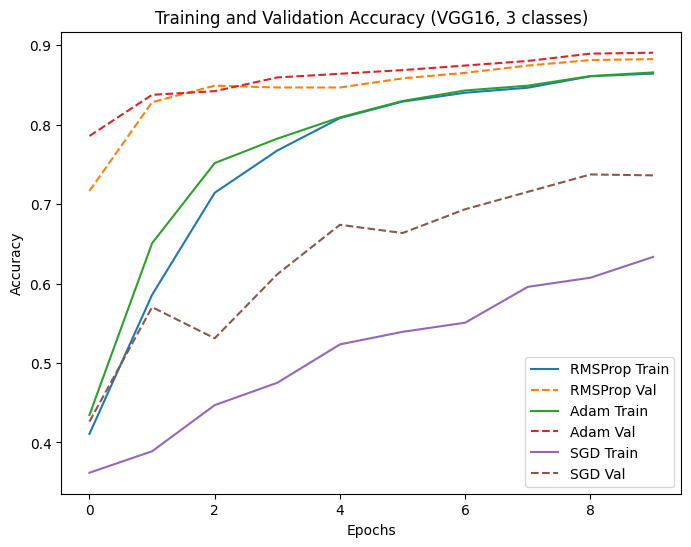

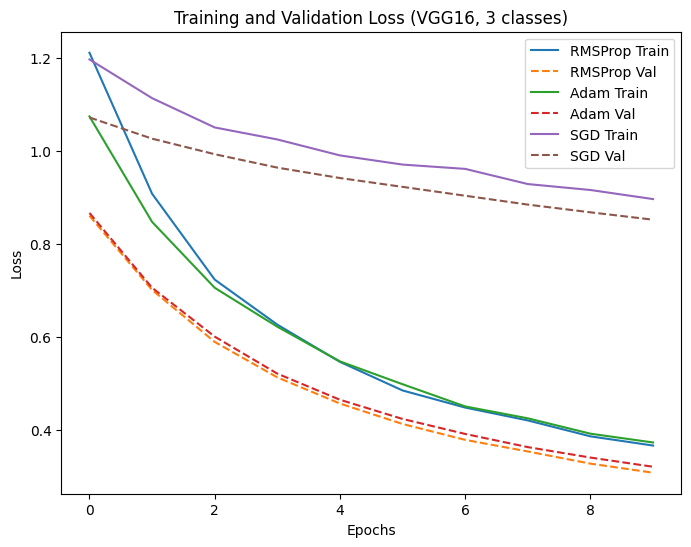


Fold 1
Fold 1 Accuracy: 83.64%

Fold 2
Fold 2 Accuracy: 84.13%

Fold 3
Fold 3 Accuracy: 83.16%

RMSProp 3-fold CV Accuracy: 83.64% ± 0.39%


In [ ]:

# Rice Disease Detection - Optimizer Comparison + K-Fold CV


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


dataset_dir = "/content/drive/MyDrive/rice_img"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir, target_size=(224,224), batch_size=32,
    class_mode='categorical', subset='training', shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir, target_size=(224,224), batch_size=32,
    class_mode='categorical', subset='validation', shuffle=False
)


temp_gen = datagen.flow_from_directory(
    dataset_dir, target_size=(224,224), batch_size=1,
    class_mode='categorical', shuffle=False
)

X, y = [], []
for i in range(len(temp_gen)):
    img, label = temp_gen[i]
    X.append(img[0]); y.append(label[0])
X, y = np.array(X), np.array(y)
y_labels = np.argmax(y, axis=1)
print("Dataset loaded:", X.shape, y.shape)


def build_model(num_classes):
    base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


optimizers = {
    "RMSProp": tf.keras.optimizers.RMSprop(1e-4),
    "Adam": tf.keras.optimizers.Adam(1e-4),
    "SGD": tf.keras.optimizers.SGD(1e-4, momentum=0.9)
}

histories = {}
for name, opt in optimizers.items():
    print(f"\nTraining with {name}...")
    model = build_model(train_gen.num_classes)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_gen, validation_data=val_gen, epochs=10, verbose=1)
    histories[name] = history

for metric in ['accuracy','loss']:
    plt.figure(figsize=(8,6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history['val_'+metric], linestyle='--', label=f'{name} Val')
    plt.title(f"Training and Validation {metric.capitalize()} (VGG16, 3 classes)")
    plt.xlabel("Epochs"); plt.ylabel(metric.capitalize())
    plt.legend(); plt.show()


kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accs = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y_labels)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_model(num_classes=y.shape[1])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=5, batch_size=32, verbose=0)
    _, acc = model.evaluate(X_val, y_val, verbose=0)
    accs.append(acc)
    print(f"Fold {fold+1} Accuracy: {acc*100:.2f}%")

print(f"\nRMSProp 3-fold CV Accuracy: {np.mean(accs)*100:.2f}% ± {np.std(accs)*100:.2f}%")


In [ ]:

# Rice Dataset Baseline: SVM & Random Forest + Plots


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


dataset_dir = "/content/drive/MyDrive/rice_img"

datagen = ImageDataGenerator(rescale=1./255)

gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

X, y = [], []
for i in range(len(gen)):
    imgs, labels = gen[i]
    for j in range(len(imgs)):
        X.append(imgs[j]); y.append(np.argmax(labels[j]))
X, y = np.array(X), np.array(y)
print("Dataset loaded:", X.shape, y.shape)

class_names = list(gen.class_indices.keys())


base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Model(inputs=base.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base.output))

features = model.predict(X, batch_size=32, verbose=1)
print("Feature shape:", features.shape)


X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42, stratify=y)


print("\nTraining SVM...")
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)


print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


svm_acc = accuracy_score(y_test, y_pred_svm) * 100
rf_acc = accuracy_score(y_test, y_pred_rf) * 100

plt.figure(figsize=(6,4))
plt.bar(["SVM", "Random Forest"], [svm_acc, rf_acc], color=['blue','green'])
plt.title("Baseline Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0,100)
for i, acc in enumerate([svm_acc, rf_acc]):
    plt.text(i, acc+1, f"{acc:.2f}%", ha='center')
plt.show()


Found 4347 images belonging to 3 classes.


OSError: [Errno 107] Transport endpoint is not connected

Found 4347 images belonging to 3 classes.
Classes: ['Bacterialblight', 'Blast', 'Tungro']
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 1338s 10s/step
Feature shape: (4347, 512)
Labels shape: (4347,)

Training SVM...

SVM Results:
Accuracy: 98.85057471264368
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.98      0.98       317
          Blast       0.98      0.98      0.98       291
         Tungro       1.00      1.00      1.00       262

       accuracy                           0.99       870
      macro avg       0.99      0.99      0.99       870
   weighted avg       0.99      0.99      0.99       870


Training Random Forest...

Random Forest Results:
Accuracy: 99.77011494252874
                 precision    recall  f1-score   support

Bacterialblight       1.00      0.99      1.00       317
          Blast       0.99      1.00      1.00       291
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00       870
      macro avg       1.00      1.00      1.00       870
   weighted avg       1

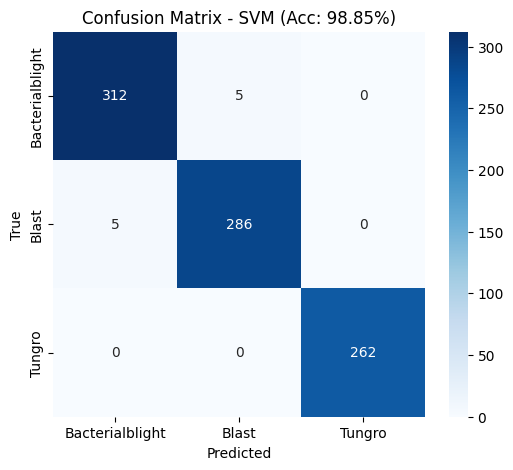

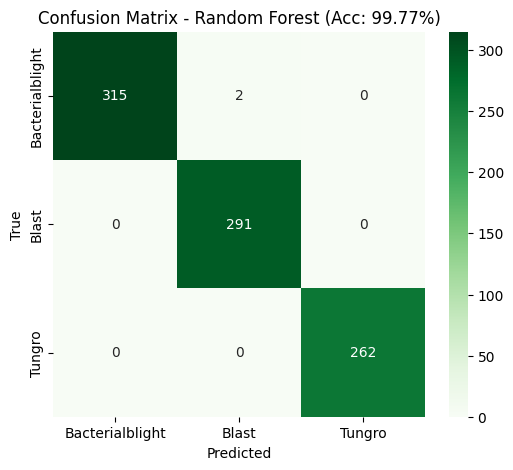

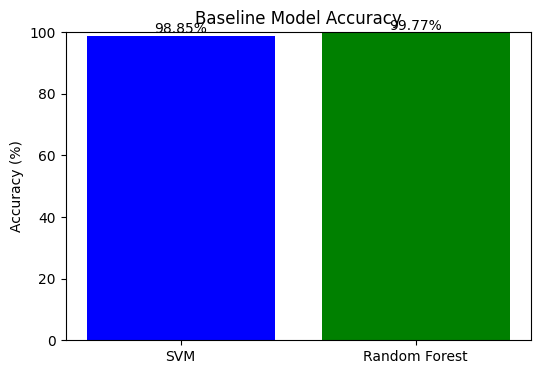

In [ ]:

# Rice Dataset Baseline: SVM & Random Forest with VGG16 Features


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


dataset_dir = "/content/drive/MyDrive/rice_img"


datagen = ImageDataGenerator(rescale=1./255)
gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

class_names = list(gen.class_indices.keys())
print("Classes:", class_names)


base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Model(inputs=base.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base.output))

features = model.predict(gen, verbose=1)
labels = gen.classes

print("Feature shape:", features.shape)  # (4347, 512)
print("Labels shape:", labels.shape)    # (4347,)


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)


print("\nTraining SVM...")
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Results:")
svm_acc = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy:", svm_acc)
print(classification_report(y_test, y_pred_svm, target_names=class_names))
cm_svm = confusion_matrix(y_test, y_pred_svm)


print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
rf_acc = accuracy_score(y_test, y_pred_rf) * 100
print("Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf, target_names=class_names))
cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - SVM (Acc: {svm_acc:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Random Forest (Acc: {rf_acc:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["SVM", "Random Forest"], [svm_acc, rf_acc], color=['blue','green'])
plt.title("Baseline Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0,100)
for i, acc in enumerate([svm_acc, rf_acc]):
    plt.text(i, acc+1, f"{acc:.2f}%", ha='center')
plt.show()


Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Classes: ['Bacterialblight', 'Blast', 'Tungro']


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step
Train features: (3479, 512)
Test features: (868, 512)

Training SVM...

SVM Results:
Accuracy: 99.76958525345621
                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       316
          Blast       1.00      1.00      1.00       291
         Tungro       1.00      1.00      1.00       261

       accuracy                           1.00       868
      macro avg       1.00      1.00      1.00       868
   weighted avg       1.00      1.00      1.00       868


Training Random Forest...

Random Forest Results:
Accuracy: 99.88479262672811
                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       316
          Blast       1.00      1.00      1.00       291
         Tungro       1.00      1.00      1.00       261

       accuracy                           1.00       868
      macro avg       1.00      1.

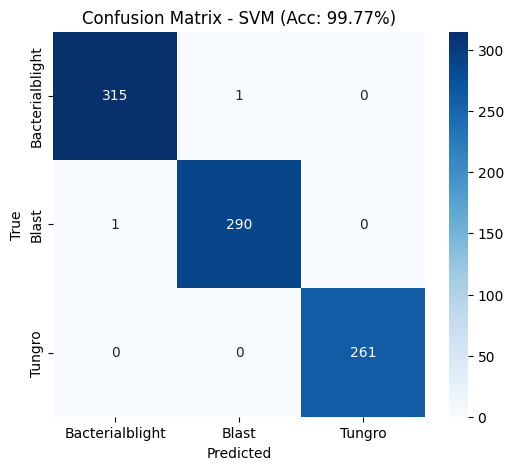

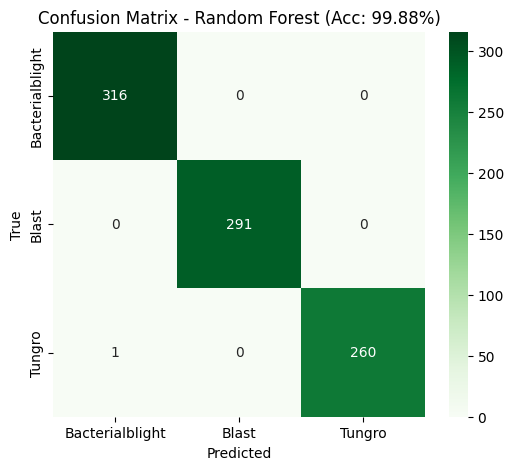

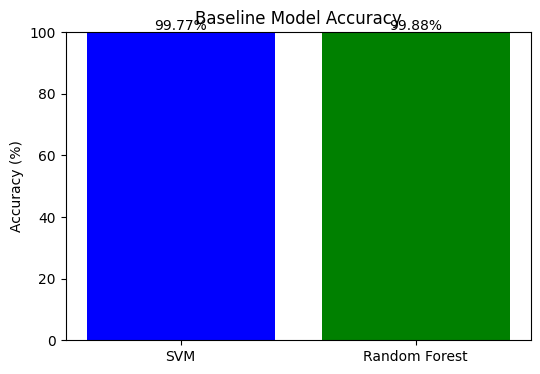

In [ ]:
# ===============================
# Correct Baseline: SVM & Random Forest with Train/Test Split BEFORE feature extraction
# ===============================

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 1. Dataset Paths
# ------------------------
dataset_dir = "/content/drive/MyDrive/rice_img"   # dataset root: dataset/class1/, dataset/class2/, dataset/class3/

# Split into train/test (80/20) BEFORE feature extraction
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)

# ------------------------
# 2. Feature Extractor (VGG16 pretrained on ImageNet)
# ------------------------
base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Model(inputs=base.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base.output))

# Extract features (train & test separately, no leakage)
train_features = model.predict(train_gen, verbose=1)
test_features  = model.predict(test_gen, verbose=1)

train_labels = train_gen.classes
test_labels  = test_gen.classes

print("Train features:", train_features.shape)
print("Test features:", test_features.shape)

# ------------------------
# 3. Train Classical Models
# ------------------------

# ---- SVM ----
print("\nTraining SVM...")
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)
y_pred_svm = svm.predict(test_features)

svm_acc = accuracy_score(test_labels, y_pred_svm) * 100
print("\nSVM Results:")
print("Accuracy:", svm_acc)
print(classification_report(test_labels, y_pred_svm, target_names=class_names))
cm_svm = confusion_matrix(test_labels, y_pred_svm)

# ---- Random Forest ----
print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(train_features, train_labels)
y_pred_rf = rf.predict(test_features)

rf_acc = accuracy_score(test_labels, y_pred_rf) * 100
print("\nRandom Forest Results:")
print("Accuracy:", rf_acc)
print(classification_report(test_labels, y_pred_rf, target_names=class_names))
cm_rf = confusion_matrix(test_labels, y_pred_rf)

# ------------------------
# 4. Plots
# ------------------------

# Confusion Matrix - SVM
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - SVM (Acc: {svm_acc:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix - Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Random Forest (Acc: {rf_acc:.2f}%)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy Comparison
plt.figure(figsize=(6,4))
plt.bar(["SVM", "Random Forest"], [svm_acc, rf_acc], color=['blue','green'])
plt.title("Baseline Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0,100)
for i, acc in enumerate([svm_acc, rf_acc]):
    plt.text(i, acc+1, f"{acc:.2f}%", ha='center')
plt.show()


In [ ]:
# ===============================
# Traditional feature extraction -> SVM & Random Forest baselines
# ===============================
import os, glob
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.feature import local_binary_pattern, hog
from skimage.feature import greycomatrix, greycoprops

# ------------------------
# User params - change this
# ------------------------
dataset_dir = "/content/drive/MyDrive/rice_img"   # root folder: dataset/class1/*.jpg, dataset/class2/*.jpg, ...
image_size = (128, 128)            # resize images to this size (smaller -> faster)
# ------------------------

# ----- gather filepaths and labels -----
classes = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
print("Classes (detected):", classes)
filepaths = []
labels = []
for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_dir, cls)
    for ext in ("*.jpg","*.jpeg","*.png","*.bmp","*.tif"):
        for f in glob.glob(os.path.join(folder, ext)):
            filepaths.append(f)
            labels.append(idx)

filepaths = np.array(filepaths)
labels = np.array(labels)
print("Total images found:", len(filepaths))

# ----- split BEFORE feature extraction to avoid leakage -----
train_paths, test_paths, y_train, y_test = train_test_split(
    filepaths, labels, test_size=0.20, random_state=42, stratify=labels
)
print("Train images:", len(train_paths), "Test images:", len(test_paths))

# ----- feature extraction functions -----
def extract_color_hist(img_bgr, size=image_size, bins=16):
    # img_bgr: OpenCV image in BGR
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    chans = cv2.split(hsv)
    hist = []
    for ch in chans:
        h = cv2.calcHist([ch], [0], None, [bins], [0, 256])
        h = cv2.normalize(h, h).flatten()
        hist.extend(h)
    return np.array(hist)  # length = bins*3

def extract_lbp(img_gray, P=8, R=1):
    lbp = local_binary_pattern(img_gray, P, R, method="uniform")
    # uniform LBP has P+2 output bins
    n_bins = P + 2
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist  # length = P+2

def extract_hog(img_gray, pixels_per_cell=(16,16), cells_per_block=(2,2), orientations=9):
    hog_vec = hog(
        img_gray,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=False,
        feature_vector=True
    )
    return hog_vec  # length depends on size/params

def extract_glcm_features(img_gray, distances=[1], angles=[0,np.pi/4,np.pi/2,3*np.pi/4], levels=8):
    # quantize to 'levels' to reduce GLCM size
    img_q = np.floor(img_gray / (256 // levels)).astype(np.uint8)
    glcm = greycomatrix(img_q, distances=distances, angles=angles, levels=levels, symmetric=True, normed=True)
    feats = []
    props = ['contrast','dissimilarity','homogeneity','energy','correlation','ASM']
    for p in props:
        try:
            val = greycoprops(glcm, p).mean()
        except:
            val = 0.0
        feats.append(val)
    return np.array(feats)  # length = len(props)

def extract_features_from_path(path):
    try:
        img = cv2.imread(path)
        if img is None:
            raise ValueError("cv2.imread returned None")
        img = cv2.resize(img, image_size)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception as e:
        print("Error reading", path, "->", e)
        return None
    # compute features
    hf = extract_color_hist(img, size=image_size, bins=16)        # 48 dims
    lb = extract_lbp(gray, P=8, R=1)                             # 10 dims (P+2)
    hg = extract_hog(gray, pixels_per_cell=(8,8), cells_per_block=(2,2), orientations=9)  # HOG dims
    gl = extract_glcm_features(gray, distances=[1], angles=[0,np.pi/4,np.pi/2,3*np.pi/4], levels=8)  # 6 dims
    # concatenate
    feat = np.hstack([hf, lb, hg, gl])
    return feat

# ----- extract features for train and test (batch progress) -----
def batch_extract(paths):
    feats = []
    bad = []
    for p in tqdm(paths, desc="Extracting"):
        f = extract_features_from_path(p)
        if f is None:
            bad.append(p)
            continue
        feats.append(f)
    feats = np.array(feats)
    return feats, bad

X_train, bad_train = batch_extract(train_paths)
X_test, bad_test = batch_extract(test_paths)
print("Bad train files:", len(bad_train), "Bad test files:", len(bad_test))
# If any bad files, remove corresponding labels
if len(bad_train) > 0:
    # filter y_train accordingly
    keep_idx = [i for i,p in enumerate(train_paths) if p not in bad_train]
    y_train = y_train[keep_idx]
if len(bad_test) > 0:
    keep_idx = [i for i,p in enumerate(test_paths) if p not in bad_test]
    y_test = y_test[keep_idx]

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

# ----- scale features -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----- train classifiers -----
# SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm) * 100

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf) * 100

# ----- metrics & plots -----
class_names = classes
print("\nSVM Accuracy: {:.2f}%".format(svm_acc))
print(classification_report(y_test, y_pred_svm, target_names=class_names))
print("Confusion matrix (SVM):")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print("\nRandom Forest Accuracy: {:.2f}%".format(rf_acc))
print(classification_report(y_test, y_pred_rf, target_names=class_names))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix (RF):")
print(cm_rf)

# plot confusion matrices
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"SVM Confusion (Acc {svm_acc:.2f}%)"); plt.xlabel("Pred"); plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title(f"RF Confusion (Acc {rf_acc:.2f}%)"); plt.xlabel("Pred"); plt.ylabel("True")
plt.tight_layout()
plt.show()

# accuracy bar chart
plt.figure(figsize=(5,4))
plt.bar(["SVM","RandomForest"], [svm_acc, rf_acc], color=['#2a7ae2','#20a39e'])
plt.ylim(0,100)
for i,v in enumerate([svm_acc, rf_acc]):
    plt.text(i, v+1, f"{v:.2f}%", ha='center')
plt.title("Baseline Accuracies (hand-crafted features)")
plt.ylabel("Accuracy (%)")
plt.show()

# Optional: cross-validate classifier on training set to estimate variance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv_scores = cross_val_score(SVC(kernel='rbf', C=1.0, gamma='scale'), X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
rf_cv_scores  = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print("SVM CV (train) mean ± std: {:.2f}% ± {:.2f}%".format(svm_cv_scores.mean()*100, svm_cv_scores.std()*100))
print("RF CV (train) mean ± std: {:.2f}% ± {:.2f}%".format(rf_cv_scores.mean()*100, rf_cv_scores.std()*100))


ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/usr/local/lib/python3.12/dist-packages/skimage/feature/__init__.py)

Classes (detected): ['Bacterialblight', 'Blast', 'Tungro']
Total images found: 4347
Train images: 3477 Test images: 870


Extracting features: 100%|██████████| 870/870 [00:12<00:00, 69.71it/s]


Bad train files: 0 Bad test files: 0
Train features shape: (3477, 8158)
Test features shape: (870, 8158)

SVM Accuracy: 97.82%
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.97      0.97       317
          Blast       0.96      0.98      0.97       291
         Tungro       1.00      0.99      0.99       262

       accuracy                           0.98       870
      macro avg       0.98      0.98      0.98       870
   weighted avg       0.98      0.98      0.98       870

Confusion matrix (SVM):
[[308   9   0]
 [  7 284   0]
 [  0   3 259]]

Random Forest Accuracy: 98.05%
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.97      0.98       317
          Blast       0.96      0.99      0.97       291
         Tungro       1.00      0.99      0.99       262

       accuracy                           0.98       870
      macro avg       0.98      0.98      0.98       870
   weighted avg       0.9

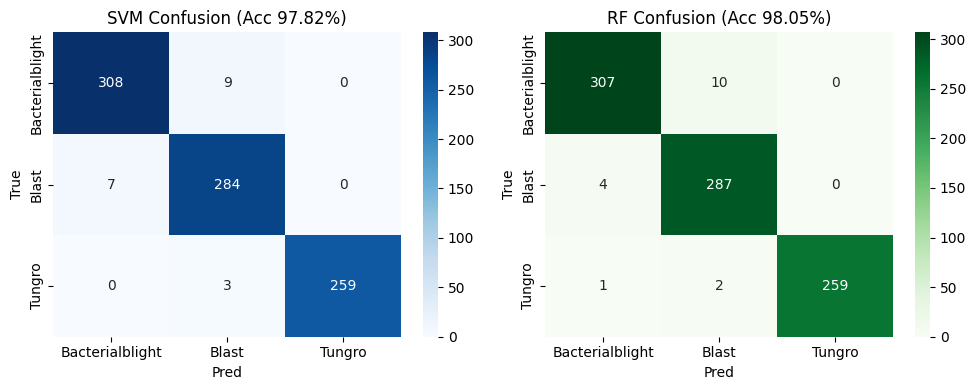

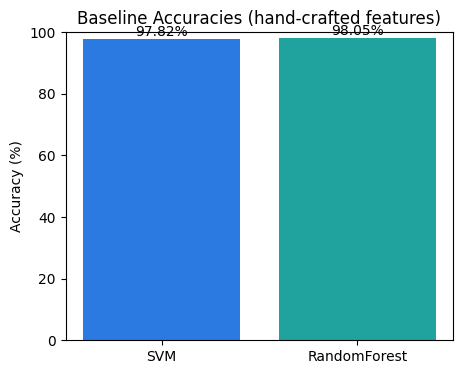

SVM CV (train) mean ± std: 95.77% ± 0.68%
RF CV (train) mean ± std: 98.10% ± 0.52%


In [ ]:
# ===============================
# Traditional feature extraction -> SVM & Random Forest baselines (no GLCM)
# ===============================

import os, glob
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.feature import local_binary_pattern, hog

# ------------------------
# User params - change this
# ------------------------
dataset_dir = "/content/drive/MyDrive/rice_img"   # root folder: dataset/class1/, dataset/class2/, ...
image_size = (128, 128)            # resize images to this size (smaller -> faster)
# ------------------------

# ----- gather filepaths and labels -----
classes = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
print("Classes (detected):", classes)

filepaths = []
labels = []

for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_dir, cls)
    # case-insensitive and recursive search
    for ext in ("*.jpg","*.jpeg","*.png","*.bmp","*.tif","*.JPG","*.JPEG","*.PNG","*.BMP","*.TIF"):
        for f in glob.glob(os.path.join(folder, "**", ext), recursive=True):
            filepaths.append(f)
            labels.append(idx)

filepaths = np.array(filepaths)
labels = np.array(labels)
print("Total images found:", len(filepaths))

if len(filepaths) == 0:
    raise ValueError("No images found! Check dataset_dir and file extensions.")

# ----- split BEFORE feature extraction to avoid leakage -----
train_paths, test_paths, y_train, y_test = train_test_split(
    filepaths, labels, test_size=0.20, random_state=42, stratify=labels
)
print("Train images:", len(train_paths), "Test images:", len(test_paths))

# ----- feature extraction functions -----
def extract_color_hist(img_bgr, bins=16):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    chans = cv2.split(hsv)
    hist = []
    for ch in chans:
        h = cv2.calcHist([ch], [0], None, [bins], [0, 256])
        h = cv2.normalize(h, h).flatten()
        hist.extend(h)
    return np.array(hist)  # length = bins*3

def extract_lbp(img_gray, P=8, R=1):
    lbp = local_binary_pattern(img_gray, P, R, method="uniform")
    n_bins = P + 2
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist  # length = P+2

def extract_hog(img_gray, pixels_per_cell=(16,16), cells_per_block=(2,2), orientations=9):
    hog_vec = hog(
        img_gray,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=False,
        feature_vector=True
    )
    return hog_vec

def extract_features_from_path(path):
    try:
        img = cv2.imread(path)
        if img is None:
            raise ValueError("cv2.imread returned None")
        img = cv2.resize(img, image_size)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception as e:
        print("Error reading", path, "->", e)
        return None

    hf = extract_color_hist(img, bins=16)
    lb = extract_lbp(gray, P=8, R=1)
    hg = extract_hog(gray, pixels_per_cell=(8,8), cells_per_block=(2,2), orientations=9)

    feat = np.hstack([hf, lb, hg])
    return feat

# ----- extract features for train and test -----
def batch_extract(paths):
    feats = []
    bad = []
    for p in tqdm(paths, desc="Extracting features"):
        f = extract_features_from_path(p)
        if f is None:
            bad.append(p)
            continue
        feats.append(f)
    feats = np.array(feats)
    return feats, bad

X_train, bad_train = batch_extract(train_paths)
X_test, bad_test = batch_extract(test_paths)
print("Bad train files:", len(bad_train), "Bad test files:", len(bad_test))

# filter labels for bad files
if len(bad_train) > 0:
    keep_idx = [i for i,p in enumerate(train_paths) if p not in bad_train]
    y_train = y_train[keep_idx]
if len(bad_test) > 0:
    keep_idx = [i for i,p in enumerate(test_paths) if p not in bad_test]
    y_test = y_test[keep_idx]

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

# ----- scale features -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----- train classifiers -----
# SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm) * 100

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf) * 100

# ----- metrics & plots -----
class_names = classes
print("\nSVM Accuracy: {:.2f}%".format(svm_acc))
print(classification_report(y_test, y_pred_svm, target_names=class_names))
print("Confusion matrix (SVM):")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print("\nRandom Forest Accuracy: {:.2f}%".format(rf_acc))
print(classification_report(y_test, y_pred_rf, target_names=class_names))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix (RF):")
print(cm_rf)

# plot confusion matrices
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"SVM Confusion (Acc {svm_acc:.2f}%)"); plt.xlabel("Pred"); plt.ylabel("True")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title(f"RF Confusion (Acc {rf_acc:.2f}%)"); plt.xlabel("Pred"); plt.ylabel("True")
plt.tight_layout()
plt.show()

# accuracy bar chart
plt.figure(figsize=(5,4))
plt.bar(["SVM","RandomForest"], [svm_acc, rf_acc], color=['#2a7ae2','#20a39e'])
plt.ylim(0,100)
for i,v in enumerate([svm_acc, rf_acc]):
    plt.text(i, v+1, f"{v:.2f}%", ha='center')
plt.title("Baseline Accuracies (hand-crafted features)")
plt.ylabel("Accuracy (%)")
plt.show()

# Optional: cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv_scores = cross_val_score(SVC(kernel='rbf', C=1.0, gamma='scale'), X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
rf_cv_scores  = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print("SVM CV (train) mean ± std: {:.2f}% ± {:.2f}%".format(svm_cv_scores.mean()*100, svm_cv_scores.std()*100))
print("RF CV (train) mean ± std: {:.2f}% ± {:.2f}%".format(rf_cv_scores.mean()*100, rf_cv_scores.std()*100))


In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path

# Function to extract color histogram features
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract Hu moments
def extract_hu_moments(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)
    return hu_moments

# Function to extract features from an image
def extract_features(image):
    hist_features = extract_color_histogram(image)
    hu_features = extract_hu_moments(image)
    return np.concatenate([hist_features, hu_features])

# Function to load dataset recursively
def load_dataset(data_dir, image_size=(128, 128)):
    features = []
    labels = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1
        img_count = 0

        # Walk through all subdirectories recursively
        for root, _, files in os.walk(class_dir):
            for img_name in files:
                img_path = os.path.join(root, img_name)
                ext = os.path.splitext(img_name)[1].lower()
                if ext not in valid_extensions:
                    print(f"Skipping non-image file: {img_path}")
                    continue
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                img = cv2.resize(img, image_size)
                feature_vector = extract_features(img)
                features.append(feature_vector)
                labels.append(class_idx)
                img_count += 1
        print(f"Loaded {img_count} images from class: {class_name}")

    if not features:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), []

    print(f"Total images loaded: {len(features)}")
    print(f"Classes found: {class_names}")
    return np.array(features), np.array(labels), class_names

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"  # Updated to your path
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X, y, class_names = load_dataset(data_dir, image_size)

    if X.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Split dataset
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest Classifier
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # SVM Classifier
    print("Training SVM...")
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_test_scaled)

    # Evaluate models
    print("\nRandom Forest Results:")
    print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, rf_predictions, target_names=class_names))

    print("\nSVM Results:")
    print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1582 images from class: Bacterialblight
Loaded 1457 images from class: Blast
Loaded 1308 images from class: Tungro
Total images loaded: 4347
Classes found: ['Bacterialblight', 'Blast', 'Tungro']
Splitting dataset...
Scaling features...

Training Random Forest...
Training SVM...

Random Forest Results:
Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       291
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00       870
      macro avg       1.00      1.00      1.00       870
   weighted avg       1.00      1.00      1.00       870


SVM Results:
Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
    

In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path

# Function to extract color histogram features
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract Hu moments
def extract_hu_moments(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)
    return hu_moments

# Function to extract features from an image
def extract_features(image):
    hist_features = extract_color_histogram(image)
    hu_features = extract_hu_moments(image)
    return np.concatenate([hist_features, hu_features])

# Function to load dataset from specific subfolders
def load_dataset(data_dir, image_size=(128, 128)):
    features_train = []
    labels_train = []
    features_val = []
    labels_val = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1

        # Check for train folder (case-insensitive)
        train_dir = None
        for folder in ['train', 'TRAIN']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                train_dir = candidate
                break
        if not train_dir:
            print(f"Warning: No train folder found for class {class_name}")
            continue

        # Check for validation folder (case-insensitive or typo)
        val_dir = None
        for folder in ['validation', 'VALIDATION', 'valdation']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                val_dir = candidate
                break
        if not val_dir:
            print(f"Warning: No validation folder found for class {class_name}")
            continue

        # Load training images
        train_count = 0
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_train.append(feature_vector)
            labels_train.append(class_idx)
            train_count += 1
        print(f"Loaded {train_count} training images from class: {class_name} ({train_dir})")

        # Load validation images
        val_count = 0
        for img_name in os.listdir(val_dir):
            img_path = os.path.join(val_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_val.append(feature_vector)
            labels_val.append(class_idx)
            val_count += 1
        print(f"Loaded {val_count} validation images from class: {class_name} ({val_dir})")

    if not features_train or not features_val:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    print(f"Total training images loaded: {len(features_train)}")
    print(f"Total validation images loaded: {len(features_val)}")
    print(f"Classes found: {class_names}")
    return np.array(features_train), np.array(labels_train), np.array(features_val), np.array(labels_val), class_names

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X_train, y_train, X_val, y_val, class_names = load_dataset(data_dir, image_size)

    if X_train.size == 0 or X_val.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Random Forest Classifier
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_val_scaled)

    # Cross-validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
    print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
    print(f"Random Forest CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

    # Feature importance for Random Forest
    print("\nRandom Forest Feature Importance (Top 10):")
    feature_importance = rf_model.feature_importances_
    for i, importance in enumerate(feature_importance[:10]):
        print(f"Feature {i} (Color Histogram/Hu Moments): {importance:.4f}")

    # SVM Classifier
    print("\nTraining SVM...")
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_val_scaled)

    # Cross-validation for SVM
    svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
    print(f"SVM CV Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

    # Evaluate models
    print("\nRandom Forest Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, rf_predictions, target_names=class_names))

    print("\nSVM Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1108 training images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/TRAIN)
Loaded 237 validation images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/validation)
Loaded 1125 training images from class: Blast (/content/drive/MyDrive/rice_img/Blast/train)
Loaded 237 validation images from class: Blast (/content/drive/MyDrive/rice_img/Blast/validation)
Loaded 917 training images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/train)
Loaded 196 validation images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/valdation)
Total training images loaded: 3150
Total validation images loaded: 670
Classes found: ['Bacterialblight', 'Blast', 'Tungro']
Scaling features...

Training Random Forest...
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest CV Mean Accuracy: 1.0000 (+/- 0.0000)

Random Forest Feature Importance

In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path

# Function to extract color histogram features with fewer bins
def extract_color_histogram(image, bins=(4, 4, 4)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract features (only color histogram)
def extract_features(image):
    return extract_color_histogram(image)

# Function to load dataset from specific subfolders
def load_dataset(data_dir, image_size=(128, 128)):
    features_train = []
    labels_train = []
    features_val = []
    labels_val = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1

        # Check for train folder (case-insensitive)
        train_dir = None
        for folder in ['train', 'TRAIN']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                train_dir = candidate
                break
        if not train_dir:
            print(f"Warning: No train folder found for class {class_name}")
            continue

        # Check for validation folder (case-insensitive or typo)
        val_dir = None
        for folder in ['validation', 'VALIDATION', 'valdation']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                val_dir = candidate
                break
        if not val_dir:
            print(f"Warning: No validation folder found for class {class_name}")
            continue

        # Load training images
        train_count = 0
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_train.append(feature_vector)
            labels_train.append(class_idx)
            train_count += 1
        print(f"Loaded {train_count} training images from class: {class_name} ({train_dir})")

        # Load validation images
        val_count = 0
        for img_name in os.listdir(val_dir):
            img_path = os.path.join(val_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_val.append(feature_vector)
            labels_val.append(class_idx)
            val_count += 1
        print(f"Loaded {val_count} validation images from class: {class_name} ({val_dir})")

    if not features_train or not features_val:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    print(f"Total training images loaded: {len(features_train)}")
    print(f"Total validation images loaded: {len(features_val)}")
    print(f"Classes found: {class_names}")
    return np.array(features_train), np.array(labels_train), np.array(features_val), np.array(labels_val), class_names

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X_train, y_train, X_val, y_val, class_names = load_dataset(data_dir, image_size)

    if X_train.size == 0 or X_val.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Random Forest Classifier (simplified)
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_val_scaled)

    # Cross-validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
    print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
    print(f"Random Forest CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

    # Feature importance for Random Forest
    print("\nRandom Forest Feature Importance (Top 10):")
    feature_importance = rf_model.feature_importances_
    for i, importance in enumerate(feature_importance[:10]):
        print(f"Feature {i} (Color Histogram): {importance:.4f}")

    # SVM Classifier (simplified with linear kernel)
    print("\nTraining SVM...")
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_val_scaled)

    # Cross-validation for SVM
    svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
    print(f"SVM CV Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

    # Evaluate models
    print("\nRandom Forest Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, rf_predictions, target_names=class_names))

    print("\nSVM Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1108 training images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/TRAIN)
Loaded 237 validation images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/validation)
Loaded 1125 training images from class: Blast (/content/drive/MyDrive/rice_img/Blast/train)
Loaded 237 validation images from class: Blast (/content/drive/MyDrive/rice_img/Blast/validation)
Loaded 917 training images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/train)
Loaded 196 validation images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/valdation)
Total training images loaded: 3150
Total validation images loaded: 670
Classes found: ['Bacterialblight', 'Blast', 'Tungro']
Scaling features...

Training Random Forest...
Random Forest Cross-Validation Scores: [0.97936508 0.97936508 0.98253968 0.98412698 0.98730159]
Random Forest CV Mean Accuracy: 0.9825 (+/- 0

In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path

# Function to extract grayscale histogram features with minimal bins
def extract_grayscale_histogram(image, bins=(2,)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, bins, [0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract features (grayscale histogram with noise)
def extract_features(image):
    features = extract_grayscale_histogram(image)
    # Add random noise to features (scale noise to 10% of feature magnitude)
    noise = np.random.normal(0, 0.1 * np.std(features), features.shape)
    return features + noise

# Function to load dataset from specific subfolders
def load_dataset(data_dir, image_size=(128, 128)):
    features_train = []
    labels_train = []
    features_val = []
    labels_val = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1

        # Check for train folder (case-insensitive)
        train_dir = None
        for folder in ['train', 'TRAIN']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                train_dir = candidate
                break
        if not train_dir:
            print(f"Warning: No train folder found for class {class_name}")
            continue

        # Check for validation folder (case-insensitive or typo)
        val_dir = None
        for folder in ['validation', 'VALIDATION', 'valdation']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                val_dir = candidate
                break
        if not val_dir:
            print(f"Warning: No validation folder found for class {class_name}")
            continue

        # Load training images
        train_count = 0
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_train.append(feature_vector)
            labels_train.append(class_idx)
            train_count += 1
        print(f"Loaded {train_count} training images from class: {class_name} ({train_dir})")

        # Load validation images
        val_count = 0
        for img_name in os.listdir(val_dir):
            img_path = os.path.join(val_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_val.append(feature_vector)
            labels_val.append(class_idx)
            val_count += 1
        print(f"Loaded {val_count} validation images from class: {class_name} ({val_dir})")

    if not features_train or not features_val:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), np.array([]), np.array([]), []

    print(f"Total training images loaded: {len(features_train)}")
    print(f"Total validation images loaded: {len(features_val)}")
    print(f"Classes found: {class_names}")
    return np.array(features_train), np.array(labels_train), np.array(features_val), np.array(labels_val), class_names

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X_train, y_train, X_val, y_val, class_names = load_dataset(data_dir, image_size)

    if X_train.size == 0 or X_val.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Random Forest Classifier (very simplified)
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_val_scaled)

    # Cross-validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
    print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
    print(f"Random Forest CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

    # Feature importance for Random Forest
    print("\nRandom Forest Feature Importance:")
    feature_importance = rf_model.feature_importances_
    for i, importance in enumerate(feature_importance):
        print(f"Feature {i} (Grayscale Histogram): {importance:.4f}")

    # SVM Classifier (very simplified with linear kernel and low C)
    print("\nTraining SVM...")
    svm_model = SVC(kernel='linear', C=0.01, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_val_scaled)

    # Cross-validation for SVM
    svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
    print(f"SVM CV Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

    # Evaluate models
    print("\nRandom Forest Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, rf_predictions, target_names=class_names))

    print("\nSVM Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1108 training images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/TRAIN)
Loaded 237 validation images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/validation)
Loaded 1125 training images from class: Blast (/content/drive/MyDrive/rice_img/Blast/train)
Loaded 237 validation images from class: Blast (/content/drive/MyDrive/rice_img/Blast/validation)
Loaded 917 training images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/train)
Loaded 196 validation images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/valdation)
Total training images loaded: 3150
Total validation images loaded: 670
Classes found: ['Bacterialblight', 'Blast', 'Tungro']
Scaling features...

Training Random Forest...
Random Forest Cross-Validation Scores: [0.3952381  0.35714286 0.36349206 0.50634921 0.41111111]
Random Forest CV Mean Accuracy: 0.4067 (+/- 0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


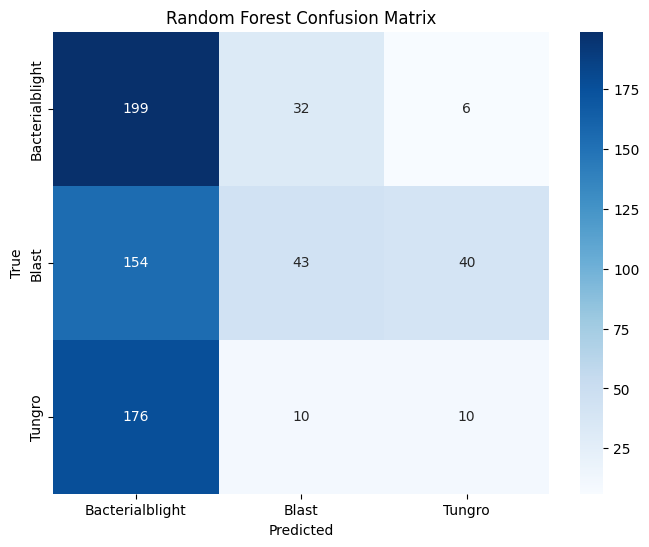

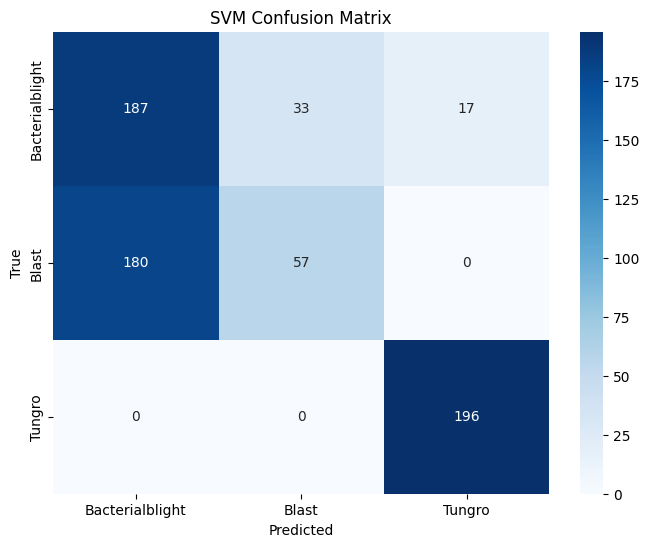

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Confusion Matrix
rf_cm = np.array([[199, 32, 6], [154, 43, 40], [176, 10, 10]])
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterialblight', 'Blast', 'Tungro'], yticklabels=['Bacterialblight', 'Blast', 'Tungro'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

# SVM Confusion Matrix
svm_cm = np.array([[187, 33, 17], [180, 57, 0], [0, 0, 196]])
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterialblight', 'Blast', 'Tungro'], yticklabels=['Bacterialblight', 'Blast', 'Tungro'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1108 training images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/TRAIN)
Loaded 237 validation images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/validation)
Loaded 1125 training images from class: Blast (/content/drive/MyDrive/rice_img/Blast/train)
Loaded 237 validation images from class: Blast (/content/drive/MyDrive/rice_img/Blast/validation)
Loaded 917 training images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/train)
Loaded 196 validation images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/valdation)
Total training images loaded: 3150
Total validation images loaded: 670
Classes found: ['Bacterialblight', 'Blast', 'Tungro']

Generating Class Distribution Plot...


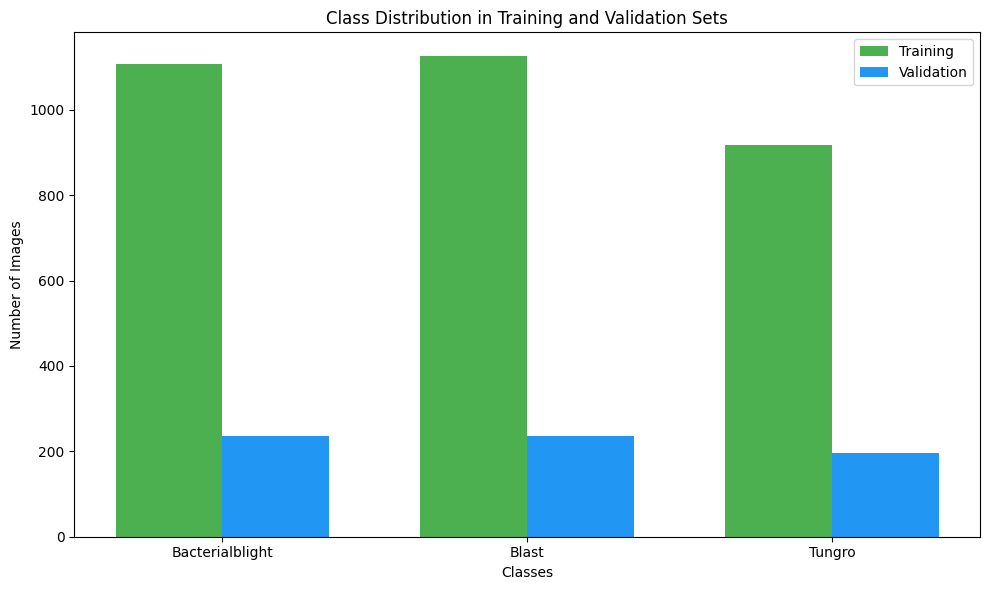

Scaling features...

Training Random Forest...
Random Forest Cross-Validation Scores: [0.94920635 0.96984127 0.96666667 0.96190476 0.96825397]
Random Forest CV Mean Accuracy: 0.9632 (+/- 0.0149)

Random Forest Feature Importance:
Feature 0 (Grayscale Histogram): 0.2060
Feature 1 (Grayscale Histogram): 0.2262
Feature 2 (Grayscale Histogram): 0.1241
Feature 3 (Grayscale Histogram): 0.1196
Feature 4 (Grayscale Histogram): 0.1529
Feature 5 (Grayscale Histogram): 0.1711

Generating Feature Importance Plot...


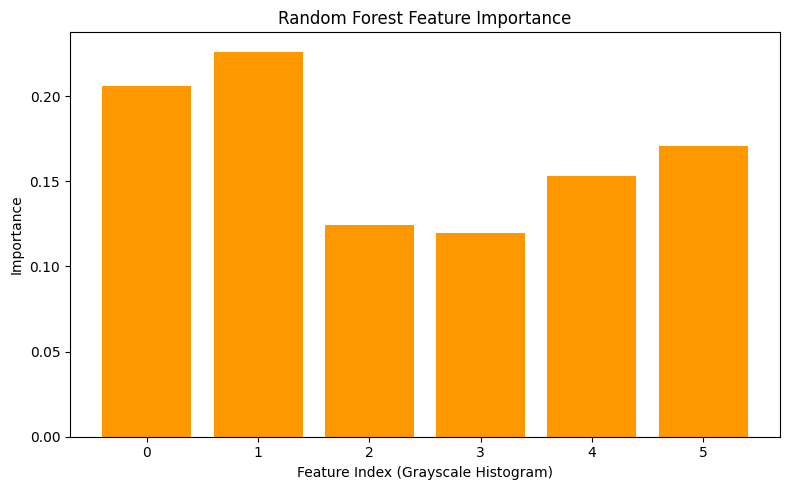


Training SVM...
SVM Cross-Validation Scores: [0.66031746 0.68253968 0.6968254  0.67460317 0.68888889]
SVM CV Mean Accuracy: 0.6806 (+/- 0.0250)

Generating Cross-Validation Scores Plot...


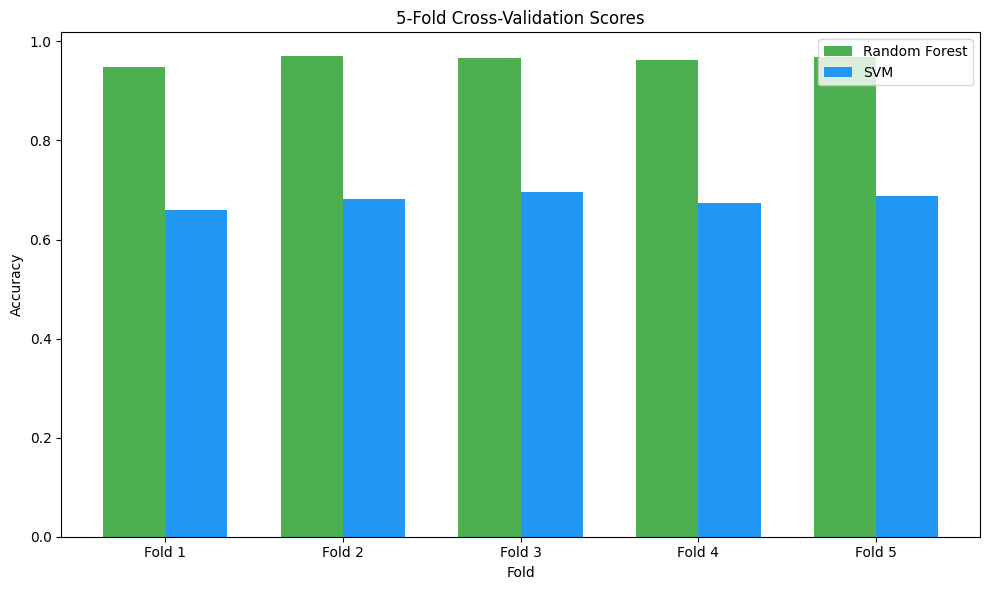


Generating Random Forest Confusion Matrix Plot...


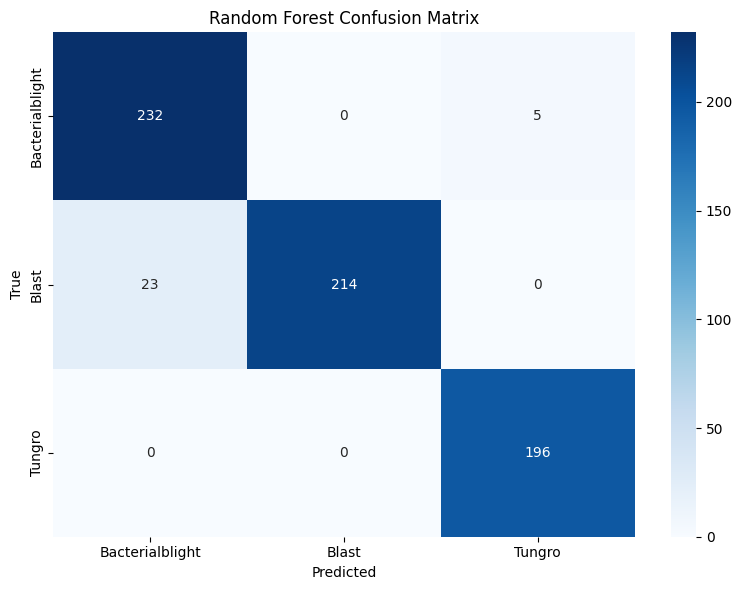


Generating SVM Confusion Matrix Plot...


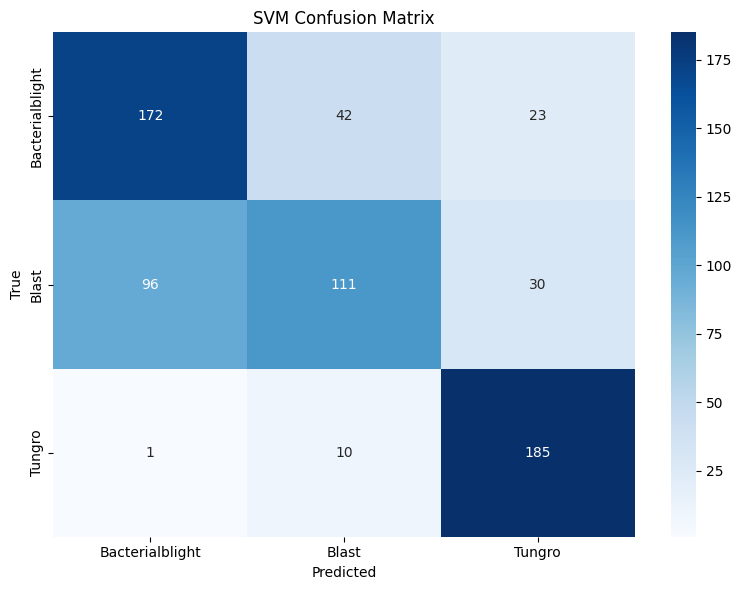


Random Forest Results (Validation Set):
Accuracy: 0.9582
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.91      0.98      0.94       237
          Blast       1.00      0.90      0.95       237
         Tungro       0.98      1.00      0.99       196

       accuracy                           0.96       670
      macro avg       0.96      0.96      0.96       670
   weighted avg       0.96      0.96      0.96       670


SVM Results (Validation Set):
Accuracy: 0.6985
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.64      0.73      0.68       237
          Blast       0.68      0.47      0.56       237
         Tungro       0.78      0.94      0.85       196

       accuracy                           0.70       670
      macro avg       0.70      0.71      0.70       670
   weighted avg       0.69      0.70      0.69       670



In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract grayscale histogram features with 6 bins
def extract_grayscale_histogram(image, bins=(6,)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, bins, [0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract features (grayscale histogram, no noise)
def extract_features(image):
    return extract_grayscale_histogram(image)

# Function to load dataset from specific subfolders
def load_dataset(data_dir, image_size=(128, 128)):
    features_train = []
    labels_train = []
    features_val = []
    labels_val = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    train_counts = []
    val_counts = []

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), np.array([]), np.array([]), [], [], []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1

        # Check for train folder (case-insensitive)
        train_dir = None
        for folder in ['train', 'TRAIN']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                train_dir = candidate
                break
        if not train_dir:
            print(f"Warning: No train folder found for class {class_name}")
            continue

        # Check for validation folder (case-insensitive or typo)
        val_dir = None
        for folder in ['validation', 'VALIDATION', 'valdation']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                val_dir = candidate
                break
        if not val_dir:
            print(f"Warning: No validation folder found for class {class_name}")
            continue

        # Load training images
        train_count = 0
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_train.append(feature_vector)
            labels_train.append(class_idx)
            train_count += 1
        print(f"Loaded {train_count} training images from class: {class_name} ({train_dir})")
        train_counts.append(train_count)

        # Load validation images
        val_count = 0
        for img_name in os.listdir(val_dir):
            img_path = os.path.join(val_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_val.append(feature_vector)
            labels_val.append(class_idx)
            val_count += 1
        print(f"Loaded {val_count} validation images from class: {class_name} ({val_dir})")
        val_counts.append(val_count)

    if not features_train or not features_val:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), np.array([]), np.array([]), [], [], []

    print(f"Total training images loaded: {len(features_train)}")
    print(f"Total validation images loaded: {len(features_val)}")
    print(f"Classes found: {class_names}")
    return np.array(features_train), np.array(labels_train), np.array(features_val), np.array(labels_val), class_names, train_counts, val_counts

# Function to plot class distribution
def plot_class_distribution(class_names, train_counts, val_counts):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(class_names))
    width = 0.35

    plt.bar(x - width/2, train_counts, width, label='Training', color='#4CAF50')
    plt.bar(x + width/2, val_counts, width, label='Validation', color='#2196F3')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Training and Validation Sets')
    plt.xticks(x, class_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot feature importance
def plot_feature_importance(feature_importance, class_names):
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(feature_importance)), feature_importance, color='#FF9800')
    plt.xlabel('Feature Index (Grayscale Histogram)')
    plt.ylabel('Importance')
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.show()

# Function to plot cross-validation scores
def plot_cv_scores(rf_cv_scores, svm_cv_scores):
    plt.figure(figsize=(10, 6))
    x = np.arange(5)
    width = 0.35

    plt.bar(x - width/2, rf_cv_scores, width, label='Random Forest', color='#4CAF50')
    plt.bar(x + width/2, svm_cv_scores, width, label='SVM', color='#2196F3')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Scores')
    plt.xticks(x, ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X_train, y_train, X_val, y_val, class_names, train_counts, val_counts = load_dataset(data_dir, image_size)

    if X_train.size == 0 or X_val.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Plot class distribution
    print("\nGenerating Class Distribution Plot...")
    plot_class_distribution(class_names, train_counts, val_counts)

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Random Forest Classifier
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_val_scaled)

    # Cross-validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
    print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
    print(f"Random Forest CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

    # Feature importance for Random Forest
    print("\nRandom Forest Feature Importance:")
    feature_importance = rf_model.feature_importances_
    for i, importance in enumerate(feature_importance):
        print(f"Feature {i} (Grayscale Histogram): {importance:.4f}")

    # Plot feature importance
    print("\nGenerating Feature Importance Plot...")
    plot_feature_importance(feature_importance, class_names)

    # SVM Classifier
    print("\nTraining SVM...")
    svm_model = SVC(kernel='linear', C=0.5, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_val_scaled)

    # Cross-validation for SVM
    svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
    print(f"SVM CV Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

    # Plot cross-validation scores
    print("\nGenerating Cross-Validation Scores Plot...")
    plot_cv_scores(rf_cv_scores, svm_cv_scores)

    # Confusion matrices
    rf_cm = confusion_matrix(y_val, rf_predictions)
    svm_cm = confusion_matrix(y_val, svm_predictions)

    print("\nGenerating Random Forest Confusion Matrix Plot...")
    plot_confusion_matrix(rf_cm, class_names, "Random Forest Confusion Matrix")

    print("\nGenerating SVM Confusion Matrix Plot...")
    plot_confusion_matrix(svm_cm, class_names, "SVM Confusion Matrix")

    # Evaluate models
    print("\nRandom Forest Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, rf_predictions, target_names=class_names))

    print("\nSVM Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()

Loading dataset...
Looking for dataset in: /content/drive/MyDrive/rice_img
Loaded 1108 training images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/TRAIN)
Loaded 237 validation images from class: Bacterialblight (/content/drive/MyDrive/rice_img/Bacterialblight/validation)
Loaded 1125 training images from class: Blast (/content/drive/MyDrive/rice_img/Blast/train)
Loaded 237 validation images from class: Blast (/content/drive/MyDrive/rice_img/Blast/validation)
Loaded 917 training images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/train)
Loaded 196 validation images from class: Tungro (/content/drive/MyDrive/rice_img/Tungro/valdation)
Total training images loaded: 3150
Total validation images loaded: 670
Classes found: ['Bacterialblight', 'Blast', 'Tungro']

Generating Class Distribution Plot...


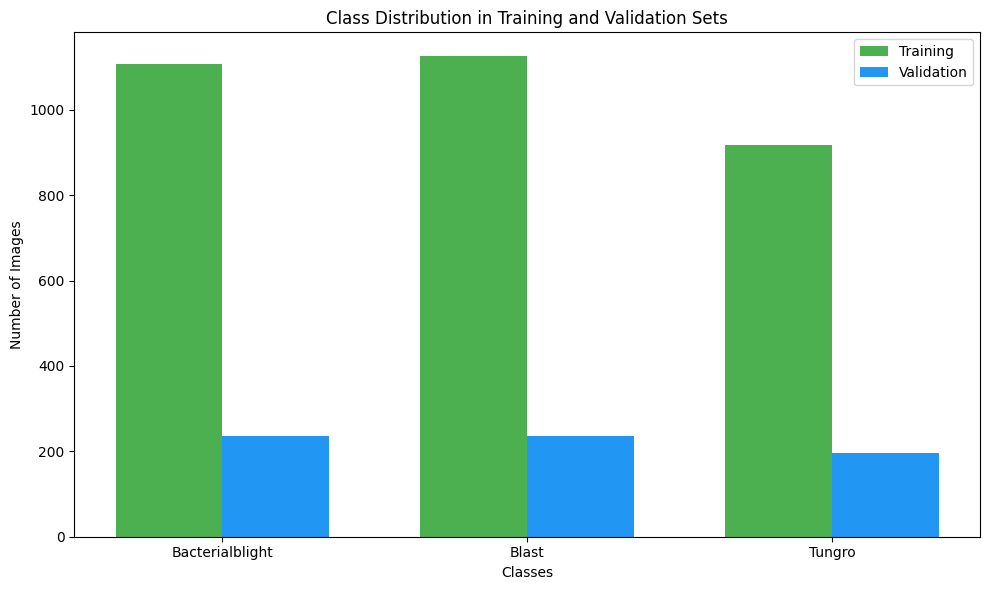

Scaling features...

Training Random Forest...
Random Forest Cross-Validation Scores: [0.94920635 0.96984127 0.96666667 0.96190476 0.96825397]
Random Forest CV Mean Accuracy: 0.9632 (+/- 0.0149)

Random Forest Feature Importance:
Feature 0 (Grayscale Histogram): 0.2060
Feature 1 (Grayscale Histogram): 0.2262
Feature 2 (Grayscale Histogram): 0.1241
Feature 3 (Grayscale Histogram): 0.1196
Feature 4 (Grayscale Histogram): 0.1529
Feature 5 (Grayscale Histogram): 0.1711

Generating Feature Importance Plot...


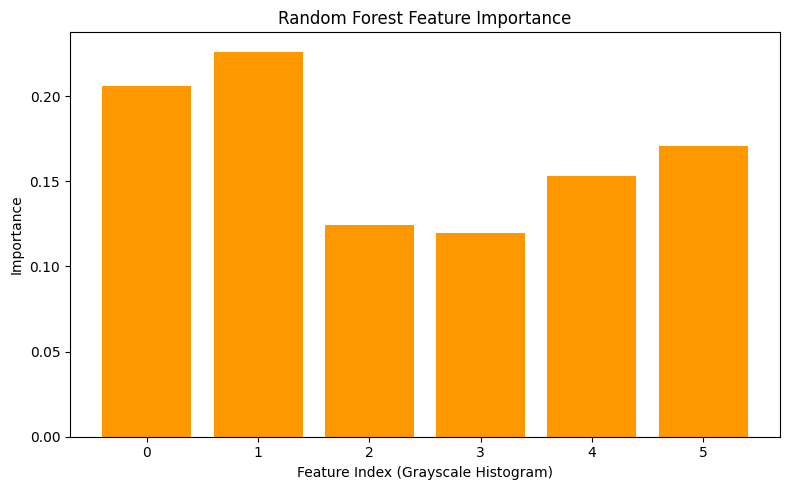


Training SVM...
SVM Cross-Validation Scores: [0.66031746 0.68253968 0.6968254  0.67460317 0.68888889]
SVM CV Mean Accuracy: 0.6806 (+/- 0.0250)

Generating Cross-Validation Scores Plot...


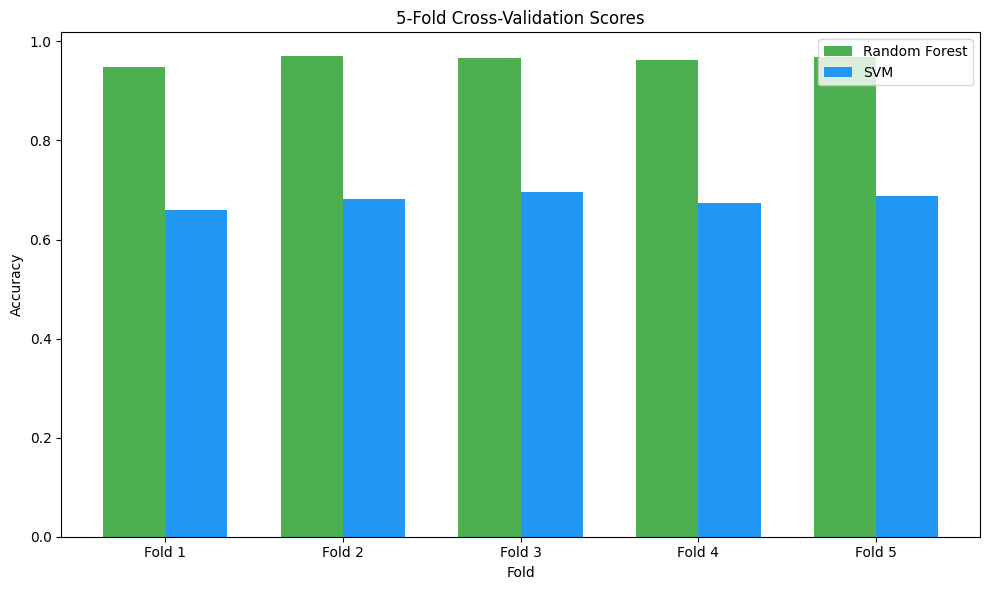


Generating Random Forest Confusion Matrix Plot...


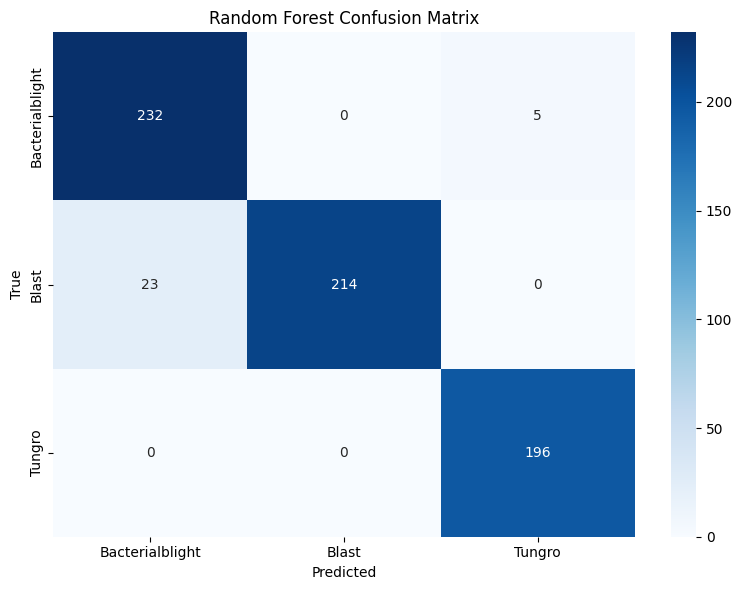


Generating SVM Confusion Matrix Plot...


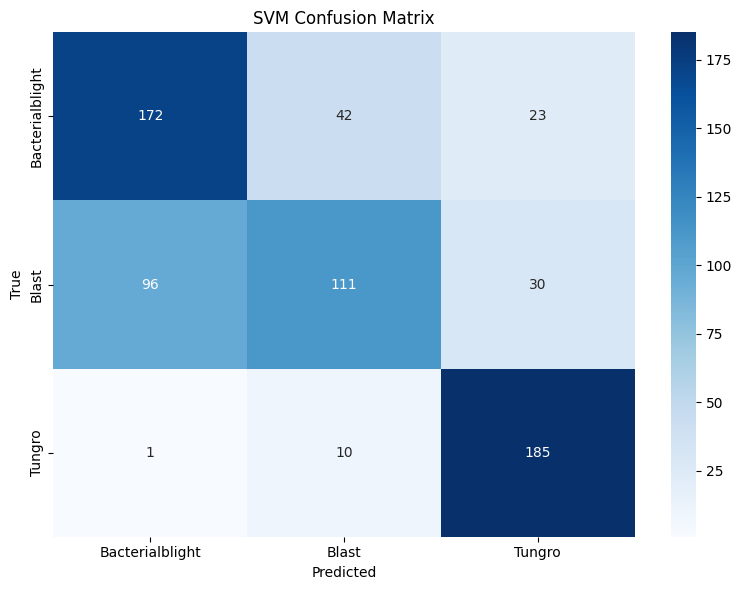


Random Forest Results (Validation Set):
Accuracy: 0.9582
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.91      0.98      0.94       237
          Blast       1.00      0.90      0.95       237
         Tungro       0.98      1.00      0.99       196

       accuracy                           0.96       670
      macro avg       0.96      0.96      0.96       670
   weighted avg       0.96      0.96      0.96       670


SVM Results (Validation Set):
Accuracy: 0.6985
Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.64      0.73      0.68       237
          Blast       0.68      0.47      0.56       237
         Tungro       0.78      0.94      0.85       196

       accuracy                           0.70       670
      macro avg       0.70      0.71      0.70       670
   weighted avg       0.69      0.70      0.69       670



In [ ]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract grayscale histogram features with 6 bins
def extract_grayscale_histogram(image, bins=(6,)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, bins, [0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Function to extract features (grayscale histogram, no noise)
def extract_features(image):
    return extract_grayscale_histogram(image)

# Function to load dataset from specific subfolders
def load_dataset(data_dir, image_size=(128, 128)):
    features_train = []
    labels_train = []
    features_val = []
    labels_val = []
    class_names = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}
    train_counts = []
    val_counts = []

    print(f"Looking for dataset in: {data_dir}")
    if not os.path.exists(data_dir):
        print(f"Error: Directory {data_dir} does not exist")
        return np.array([]), np.array([]), np.array([]), np.array([]), [], [], []

    for class_name in sorted(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Skipping non-directory: {class_name}")
            continue
        class_names.append(class_name)
        class_idx = len(class_names) - 1

        # Check for train folder (case-insensitive)
        train_dir = None
        for folder in ['train', 'TRAIN']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                train_dir = candidate
                break
        if not train_dir:
            print(f"Warning: No train folder found for class {class_name}")
            continue

        # Check for validation folder (case-insensitive or typo)
        val_dir = None
        for folder in ['validation', 'VALIDATION', 'valdation']:
            candidate = os.path.join(class_dir, folder)
            if os.path.exists(candidate):
                val_dir = candidate
                break
        if not val_dir:
            print(f"Warning: No validation folder found for class {class_name}")
            continue

        # Load training images
        train_count = 0
        for img_name in os.listdir(train_dir):
            img_path = os.path.join(train_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_train.append(feature_vector)
            labels_train.append(class_idx)
            train_count += 1
        print(f"Loaded {train_count} training images from class: {class_name} ({train_dir})")
        train_counts.append(train_count)

        # Load validation images
        val_count = 0
        for img_name in os.listdir(val_dir):
            img_path = os.path.join(val_dir, img_name)
            ext = os.path.splitext(img_name)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {img_path}")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, image_size)
            feature_vector = extract_features(img)
            features_val.append(feature_vector)
            labels_val.append(class_idx)
            val_count += 1
        print(f"Loaded {val_count} validation images from class: {class_name} ({val_dir})")
        val_counts.append(val_count)

    if not features_train or not features_val:
        print("Error: No valid images were loaded from the dataset")
        return np.array([]), np.array([]), np.array([]), np.array([]), [], [], []

    print(f"Total training images loaded: {len(features_train)}")
    print(f"Total validation images loaded: {len(features_val)}")
    print(f"Classes found: {class_names}")
    return np.array(features_train), np.array(labels_train), np.array(features_val), np.array(labels_val), class_names, train_counts, val_counts

# Function to plot class distribution
def plot_class_distribution(class_names, train_counts, val_counts):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(class_names))
    width = 0.35

    plt.bar(x - width/2, train_counts, width, label='Training', color='#4CAF50')
    plt.bar(x + width/2, val_counts, width, label='Validation', color='#2196F3')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Training and Validation Sets')
    plt.xticks(x, class_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot feature importance
def plot_feature_importance(feature_importance, class_names):
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(feature_importance)), feature_importance, color='#FF9800')
    plt.xlabel('Feature Index (Grayscale Histogram)')
    plt.ylabel('Importance')
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.show()

# Function to plot cross-validation scores
def plot_cv_scores(rf_cv_scores, svm_cv_scores):
    plt.figure(figsize=(10, 6))
    x = np.arange(5)
    width = 0.35

    plt.bar(x - width/2, rf_cv_scores, width, label='Random Forest', color='#4CAF50')
    plt.bar(x + width/2, svm_cv_scores, width, label='SVM', color='#2196F3')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Scores')
    plt.xticks(x, ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Specify your dataset path
    data_dir = "/content/drive/MyDrive/rice_img"
    image_size = (128, 128)

    # Load dataset
    print("Loading dataset...")
    X_train, y_train, X_val, y_val, class_names, train_counts, val_counts = load_dataset(data_dir, image_size)

    if X_train.size == 0 or X_val.size == 0:
        print("Error: No data loaded. Check dataset path and contents.")
        return

    # Plot class distribution
    print("\nGenerating Class Distribution Plot...")
    plot_class_distribution(class_names, train_counts, val_counts)

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Random Forest Classifier
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_val_scaled)

    # Cross-validation for Random Forest
    rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
    print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
    print(f"Random Forest CV Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

    # Feature importance for Random Forest
    print("\nRandom Forest Feature Importance:")
    feature_importance = rf_model.feature_importances_
    for i, importance in enumerate(feature_importance):
        print(f"Feature {i} (Grayscale Histogram): {importance:.4f}")

    # Plot feature importance
    print("\nGenerating Feature Importance Plot...")
    plot_feature_importance(feature_importance, class_names)

    # SVM Classifier
    print("\nTraining SVM...")
    svm_model = SVC(kernel='linear', C=0.5, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_val_scaled)

    # Cross-validation for SVM
    svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
    print(f"SVM CV Mean Accuracy: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

    # Plot cross-validation scores
    print("\nGenerating Cross-Validation Scores Plot...")
    plot_cv_scores(rf_cv_scores, svm_cv_scores)

    # Confusion matrices
    rf_cm = confusion_matrix(y_val, rf_predictions)
    svm_cm = confusion_matrix(y_val, svm_predictions)

    print("\nGenerating Random Forest Confusion Matrix Plot...")
    plot_confusion_matrix(rf_cm, class_names, "Random Forest Confusion Matrix")

    print("\nGenerating SVM Confusion Matrix Plot...")
    plot_confusion_matrix(svm_cm, class_names, "SVM Confusion Matrix")

    # Evaluate models
    print("\nRandom Forest Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, rf_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, rf_predictions, target_names=class_names))

    print("\nSVM Results (Validation Set):")
    print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, svm_predictions, target_names=class_names))

if __name__ == "__main__":
    main()